In [1]:
import pandas as pd  
df=pd.read_csv('diabetes.csv')
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
# 统计缺失值
df[df.columns[:-1]]=df[df.columns[:-1]].mask(df==0)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
import numpy as np
# 将0替换成均值
df[df.columns[:-1]]=df[df.columns[:-1]].mask(df==0).fillna(df.mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [4]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler

X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Outcome']]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

# 标准化
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')  

Mean Squared Error: 82.17


In [5]:
# 验证
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}") 

R2 Score: 0.3847087263539891


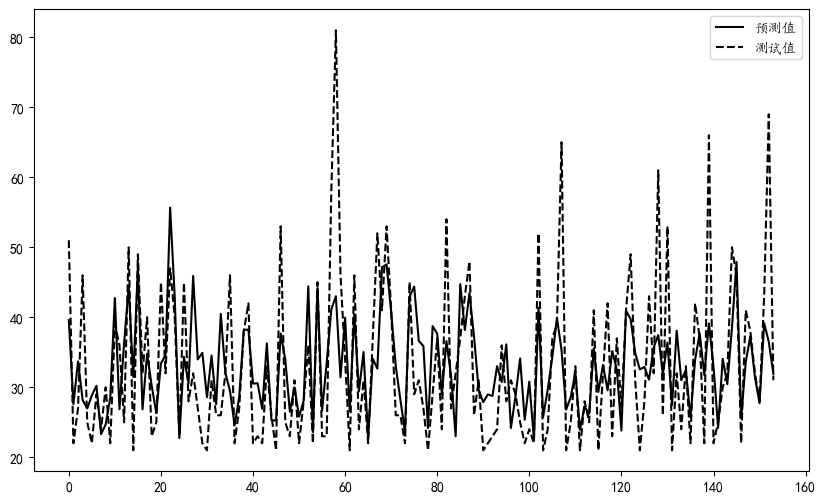

In [6]:
# 线性回归
import matplotlib.pyplot as plt
import matplotlib
# 正常显示中文
matplotlib.rcParams['font.family'] = 'Kaiti'
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.plot(range(len(y_pred)), y_pred, 'k', label="预测值")
plt.plot(range(len(y_pred)), y_test, 'k--', label="测试值")
plt.legend(loc="upper right")
plt.show()

In [7]:
# 逻辑回归 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report

X = df[df.columns[:-1]]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
clf = LogisticRegression()  

# 训练模型  
clf.fit(X_train, y_train)  
  
# 预测测试集的结果  
y_pred = clf.predict(X_test)  
  
# 评估模型性能  
print("Accuracy:", clf.score(X_test, y_test))  
print("Classification Report:")  
print(classification_report(y_test, y_pred))

Accuracy: 0.7792207792207793
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



D:\anacon\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


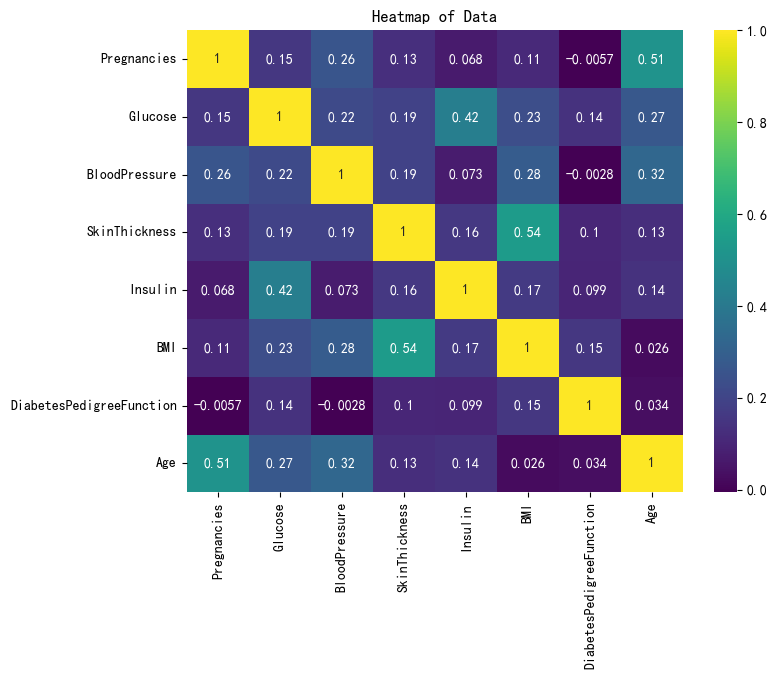

In [8]:
import seaborn as sns
mar = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(mar, annot=True, cmap='viridis')
plt.title('Heatmap of Data')
plt.show()